<a href="https://colab.research.google.com/github/Humble-LiuAo/Deep-learning/blob/main/k-means/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
workplace = 'ML'
try:
    os.chdir(os.path.join('/content/drive/MyDrive', workplace))
except:
    os.mkdir(os.path.join('/content/drive/MyDrive', workplace))
    os.chdir(os.path.join('/content/drive/MyDrive', workplace))

## Import package

In [2]:
#matrix math
import numpy as np
#graphing
import matplotlib.pyplot as plt
#graphing animation
import matplotlib.animation as animation

## Dataset

In [3]:
#load textfile dataset (2D data points)
# for each user, how many packets are sent per second and what's the size of a packet
#anomalies (DDOS attempts) will have lots of big packets sent in a short amount of time 
def load_dataset(name):
    return np.loadtxt(name)

In [4]:
dataset = load_dataset('durudataset.txt')
dataset

array([[0.19670575, 0.26617497],
       [0.41328699, 0.35582835],
       [0.33843555, 0.43573826],
       [0.10380152, 0.16434481],
       [0.15905236, 0.32505901],
       [0.06690549, 0.48741807],
       [0.33573144, 0.03798368],
       [0.28549554, 0.29350958],
       [0.08488353, 0.20694325],
       [0.07382789, 0.15456821],
       [0.23803986, 0.13191702],
       [0.45405121, 0.37938313],
       [0.27608751, 0.49760799],
       [0.01646995, 0.09328572],
       [0.02693146, 0.39057263],
       [0.40253161, 0.09789899],
       [0.22568743, 0.49617949],
       [0.19132311, 0.40113078],
       [0.39482185, 0.21211335],
       [0.18214343, 0.36443193],
       [1.49835358, 1.40350139],
       [1.80899027, 1.93497909],
       [1.35650893, 1.47948455],
       [1.07324343, 1.23179161],
       [1.59099146, 1.39629025],
       [1.91018783, 1.70507748],
       [1.19376594, 1.55855903],
       [1.43236779, 1.7566307 ],
       [1.74915973, 1.99548106],
       [1.03918449, 1.9624314 ],
       [1.

## 欧式距离

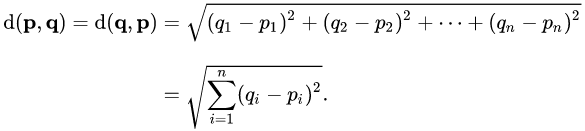

In [5]:
#euclidian distance between 2 data points. For as many data points as necessary. 
def euclidian(a, b):
    return np.linalg.norm(a-b)

In [6]:
x = [2,3]
y = [4,6]
a = np.array(x)
b = np.array(y)
euclidian(a,b)

3.605551275463989

## k-means algorithm

O k-means algorithm With the above steps, since we needed to build our algorithm, which will receive as parameters:

* K: The number of clusters (required)
* epsilon: The minimum error to be used in the stop condition (optional, default == 0)
* Distance: The method is used to calculate the distance (Optional defalut == 0) And has the return:
* the centroids
* The evolution history of centroids
* And the membership vector of each instance with its respective centroid

In [33]:
def kmeans(k, epsilon=0, distance='euclidian'):
    #list to store past centroid
    history_centroids = []
    #set the distance calculation type 
    if distance == 'euclidian':
        dist_method = euclidian
    #set the dataset
    dataset = load_dataset('durudataset.txt')
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    # get the number of rows (instances) and columns (features) from the dataset
    num_instances, num_features = dataset.shape
    #define k centroids (how many clusters do we want to find?) chosen randomly 
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    #set these to our list of past centroid (to show progress over time)
    history_centroids.append(prototypes)
    #to keep track of centroid at every iteration
    prototypes_old = np.zeros(prototypes.shape)
    #to store clusters
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon and iteration < 100:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        #for each instance in the dataset
        for index_instance, instance in enumerate(dataset):
            #define a distance vector of size k
            dist_vec = np.zeros((k,1))
            #for each centroid
            for index_prototype, prototype in enumerate(prototypes):
                #compute the distance between x and centroid
                dist_vec[index_prototype] = dist_method(prototype, instance)
            #find the smallest distance, assign that distance to a cluster
            belongs_to[index_instance, 0] = np.argmin(dist_vec)
            
        tmp_prototypes = np.zeros((k, num_features))
        
        #for each cluster (k of them)
        for index in range(len(prototypes)):
            #get all the points assigned to a cluster
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            #find the mean of those points, this is our new centroid
            prototype = np.mean(dataset[instances_close], axis=0)
            #add our new centroid to our new temporary list
            tmp_prototypes[index, :] = prototype
        
        #set the new list to the current list
        prototypes = tmp_prototypes
        
        #add our calculated centroids to our history for plotting
        history_centroids.append(tmp_prototypes)

    #return calculated centroids, history of them all, and assignments for which cluster each datapoint belongs to
    return prototypes, history_centroids, belongs_to


## Plot

In [34]:
#lets define a plotting algorithm for our dataset and our centroids
def plot(dataset, history_centroids, belongs_to):
    #we'll have 2 colors for each centroid cluster
    colors = ['r', 'g']

    #split our graph by its axis and actual plot
    fig, ax = plt.subplots()

    #for each point in our dataset
    for index in range(dataset.shape[0]):
        #get all the points assigned to a cluster
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        #assign each datapoint in that cluster a color and plot it
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    #lets also log the history of centroids calculated via training
    history_points = []
    #for each centroid ever calculated
    for index, centroids in enumerate(history_centroids):
        #print them all out
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.show()

## main

centroids 1 [1.6436121  1.66726672]


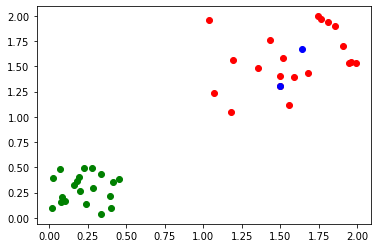

centroids 1 [0.40750289 0.43730433]
centroids 2 [1.58058247 1.56897412]
centroids 2 [0.22331067 0.28960446]
centroids 3 [1.58058247 1.56897412]
centroids 3 [0.22331067 0.28960446]
centroids 4 [1.58058247 1.56897412]
centroids 4 [0.22331067 0.28960446]
centroids 5 [1.58058247 1.56897412]
centroids 5 [0.22331067 0.28960446]
centroids 6 [1.58058247 1.56897412]
centroids 6 [0.22331067 0.28960446]
centroids 7 [1.58058247 1.56897412]
centroids 7 [0.22331067 0.28960446]
centroids 8 [1.58058247 1.56897412]
centroids 8 [0.22331067 0.28960446]
centroids 9 [1.58058247 1.56897412]
centroids 9 [0.22331067 0.28960446]
centroids 10 [1.58058247 1.56897412]
centroids 10 [0.22331067 0.28960446]
centroids 11 [1.58058247 1.56897412]
centroids 11 [0.22331067 0.28960446]
centroids 12 [1.58058247 1.56897412]
centroids 12 [0.22331067 0.28960446]
centroids 13 [1.58058247 1.56897412]
centroids 13 [0.22331067 0.28960446]
centroids 14 [1.58058247 1.56897412]
centroids 14 [0.22331067 0.28960446]
centroids 15 [1.58

In [35]:
#load dataset
dataset = load_dataset('durudataset.txt')
#train the model on the data
centroids, history_centroids, belongs_to = kmeans(2)
#plot the results
plot(dataset, history_centroids, belongs_to)

## plot each step centriods

In [36]:
def plot_step_by_step(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                
                plt.pause(0.8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


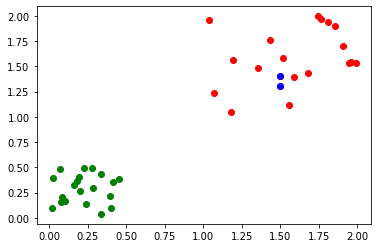

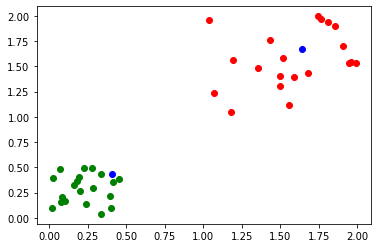

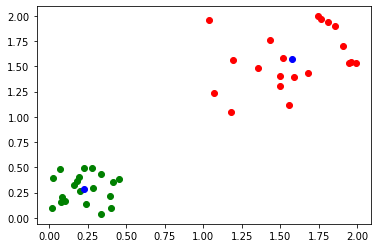

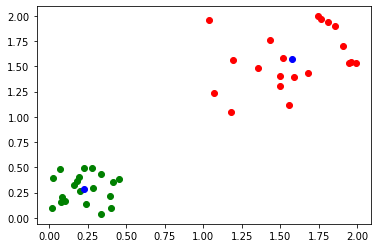

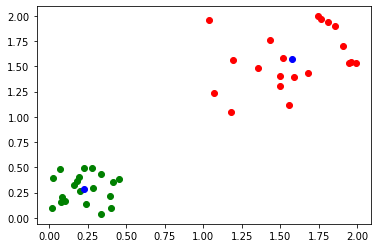

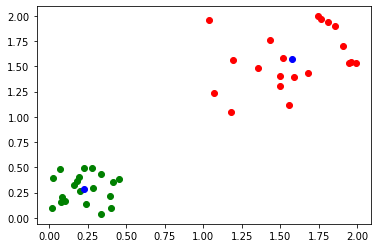

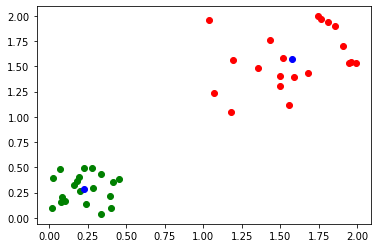

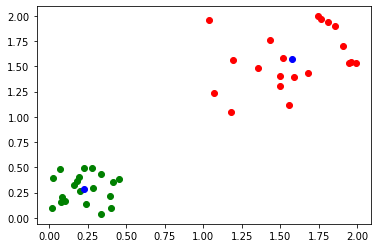

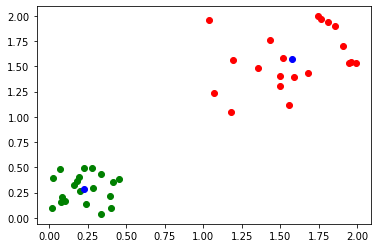

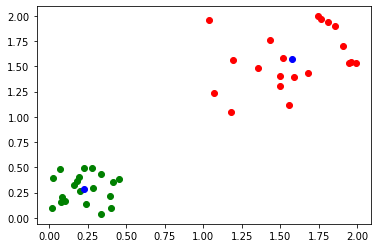

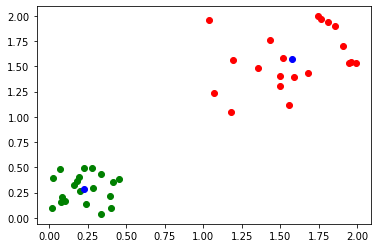

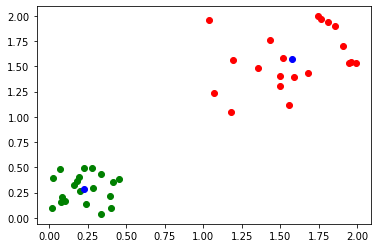

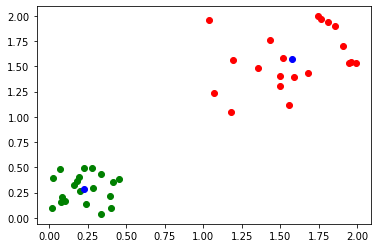

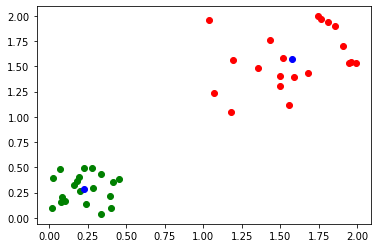

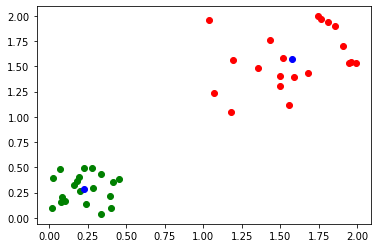

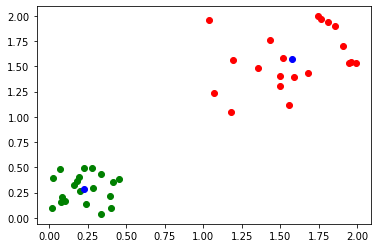

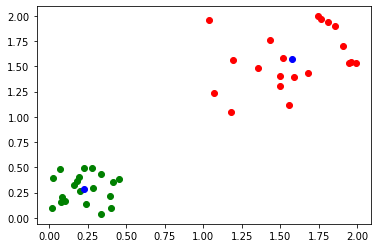

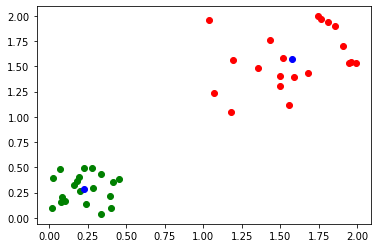

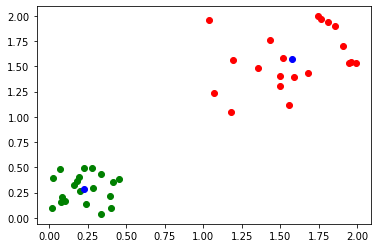

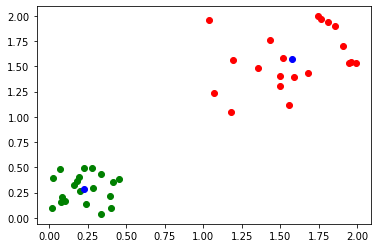

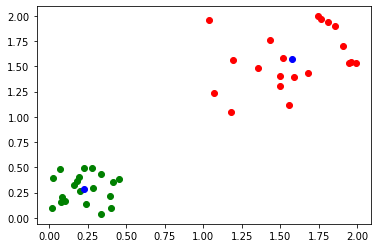

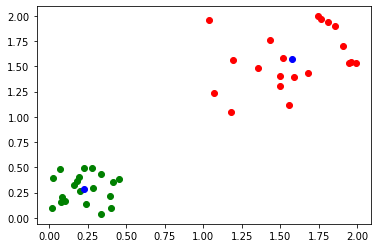

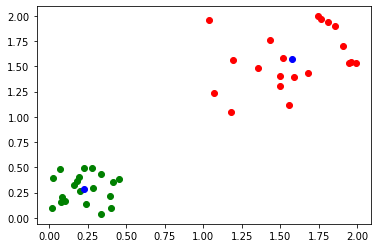

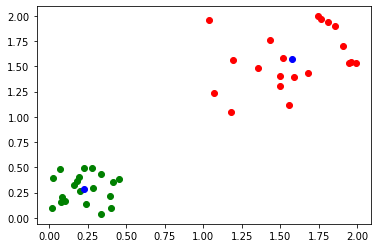

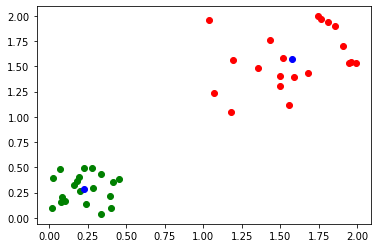

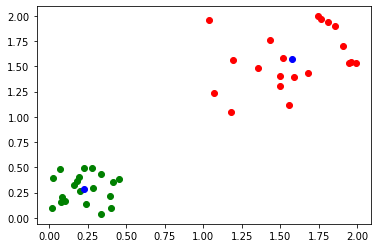

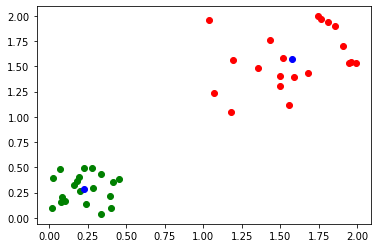

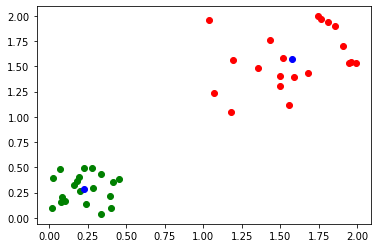

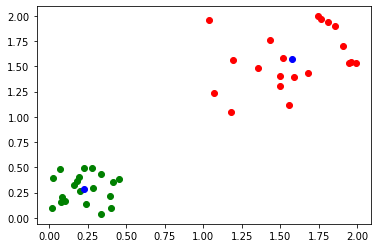

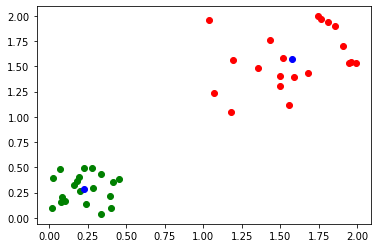

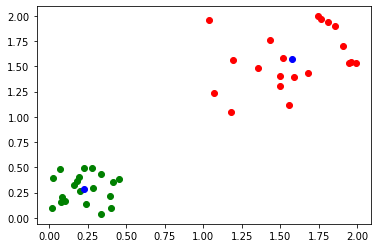

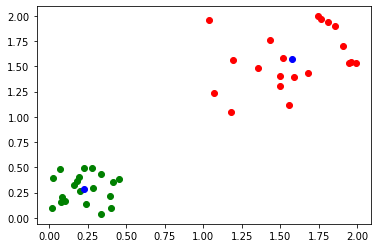

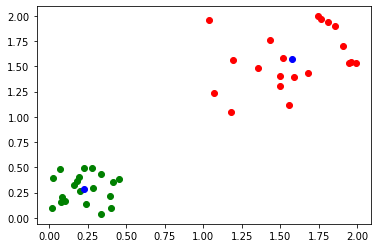

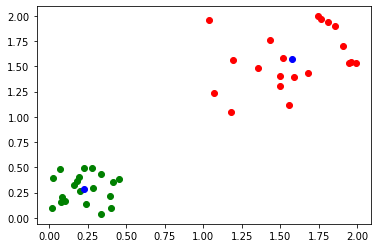

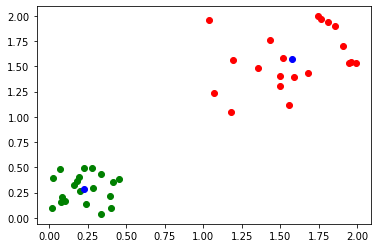

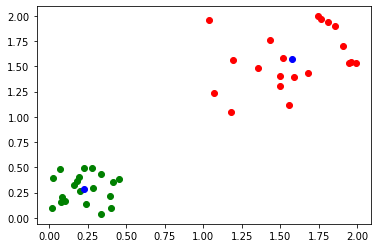

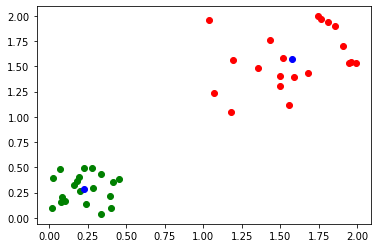

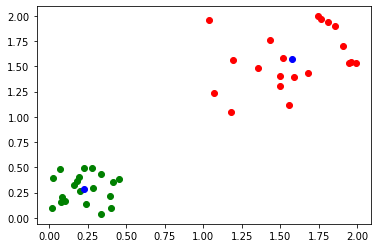

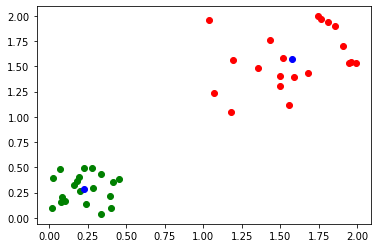

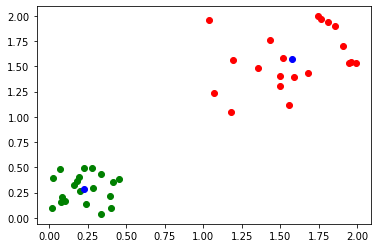

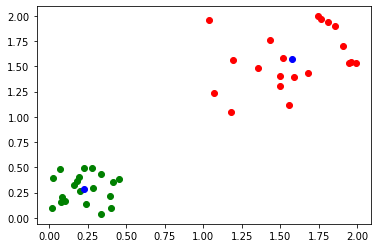

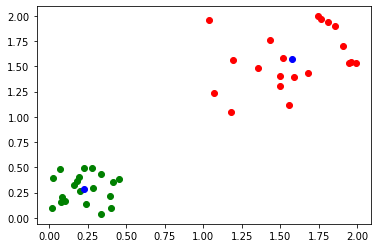

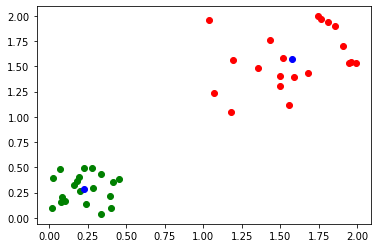

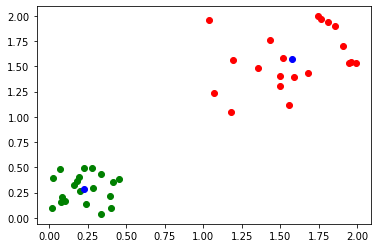

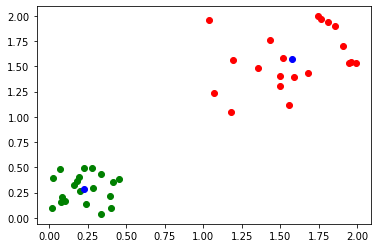

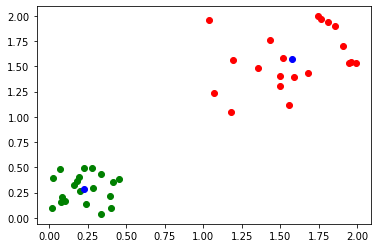

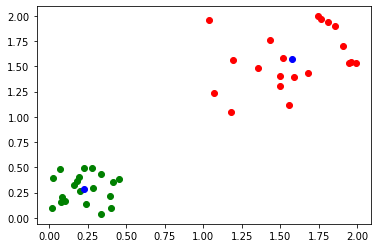

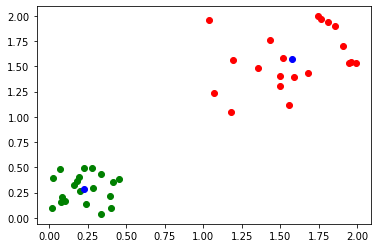

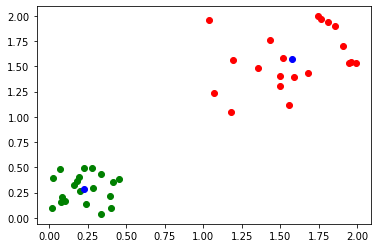

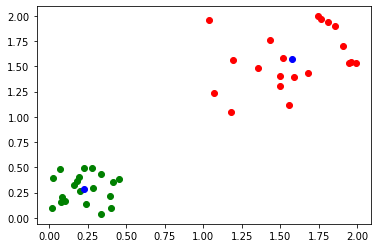

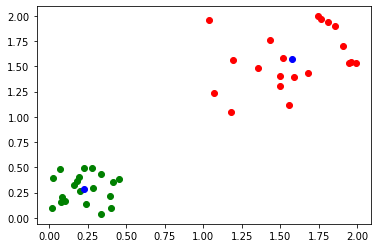

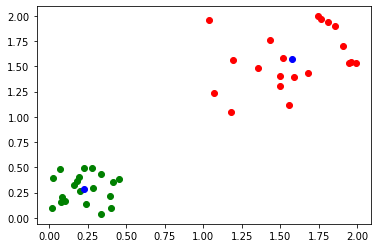

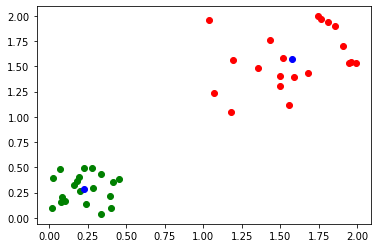

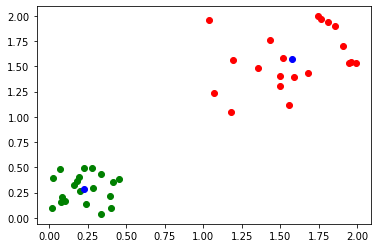

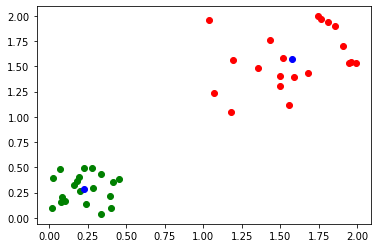

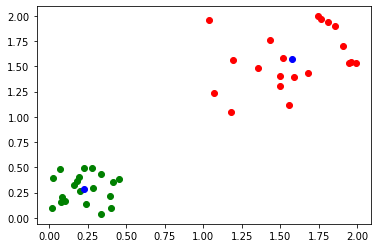

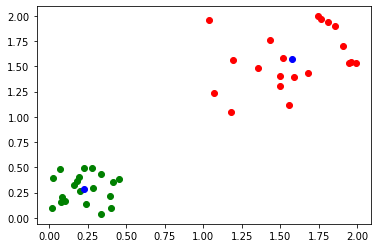

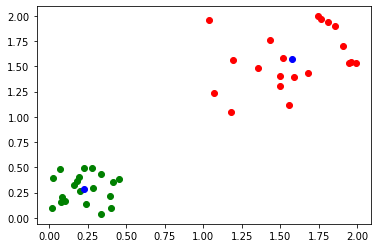

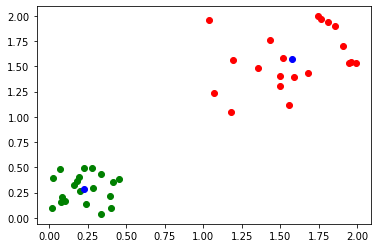

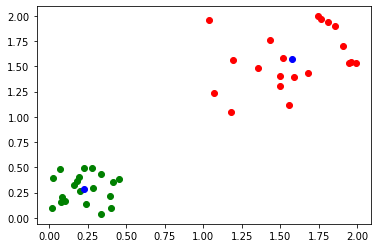

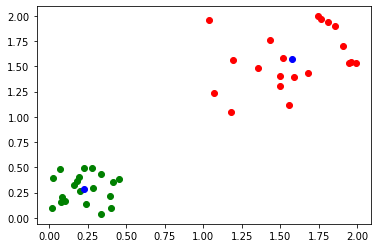

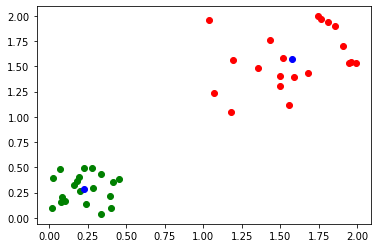

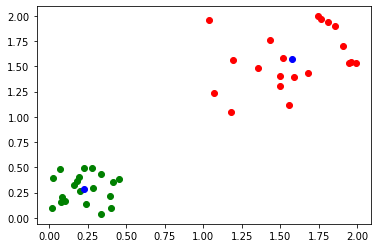

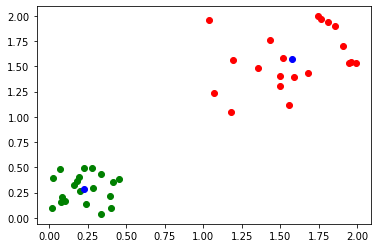

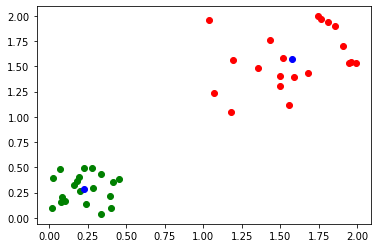

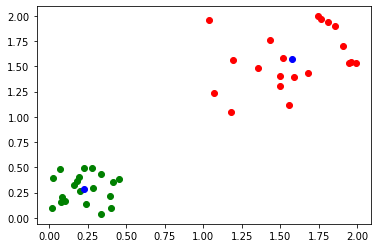

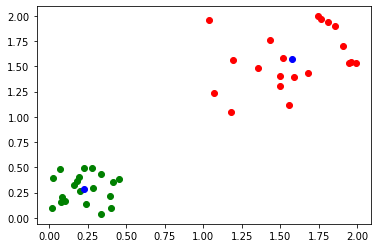

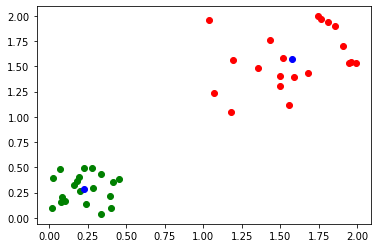

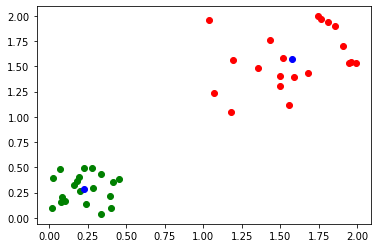

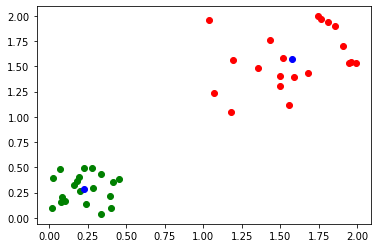

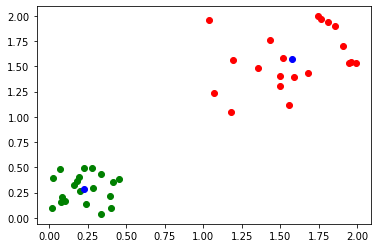

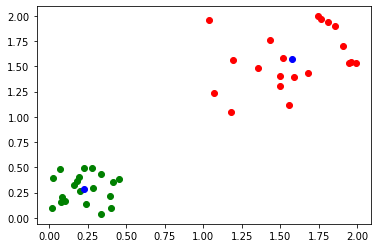

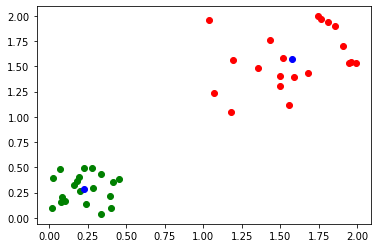

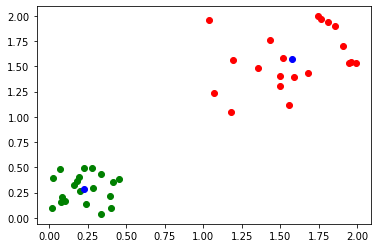

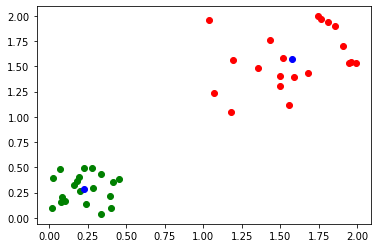

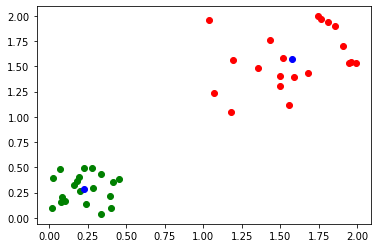

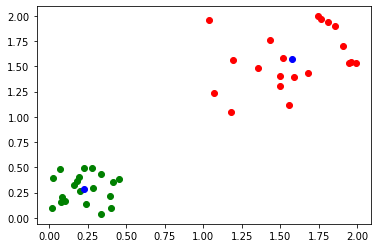

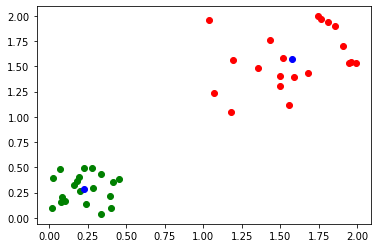

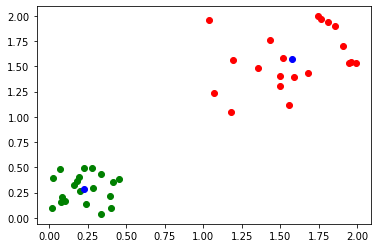

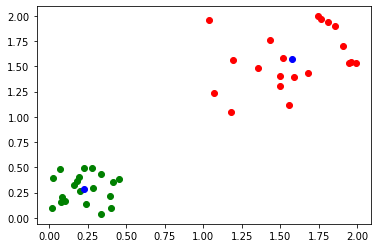

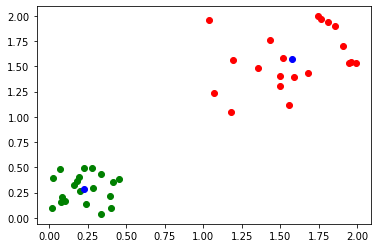

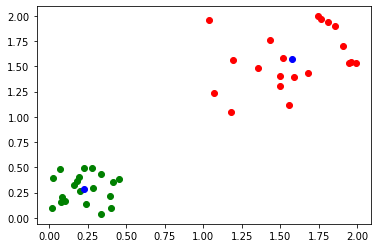

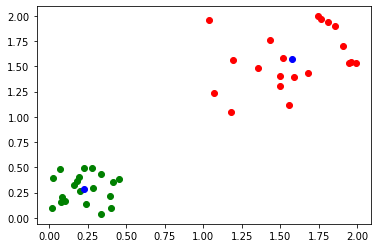

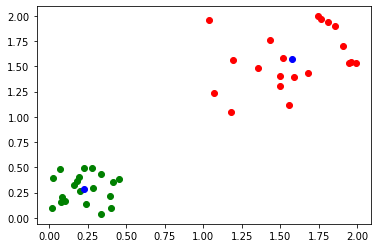

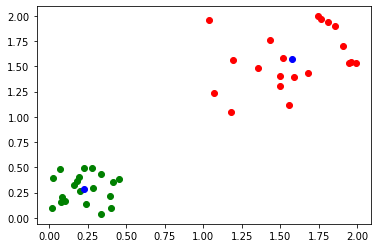

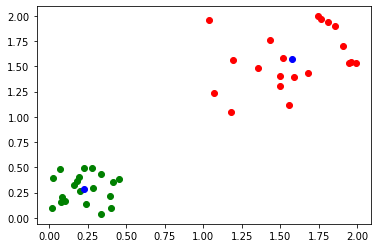

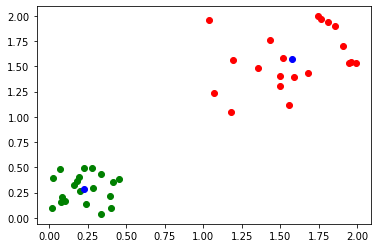

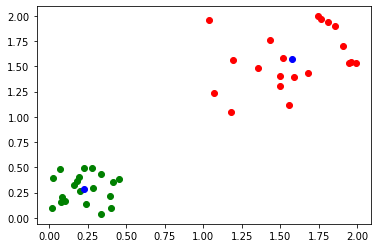

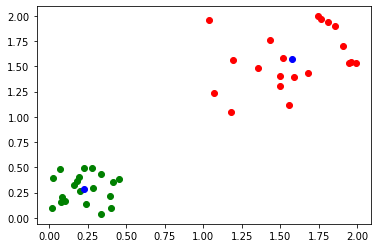

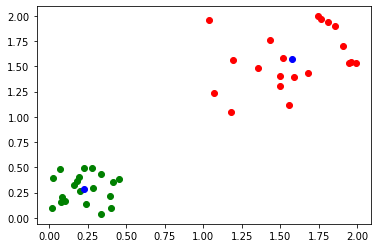

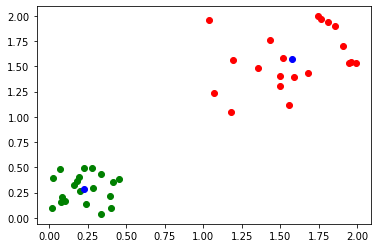

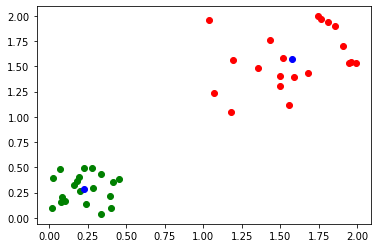

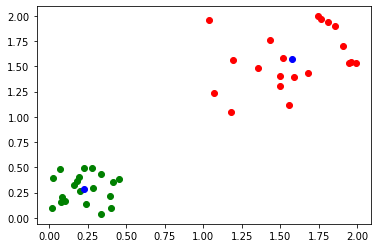

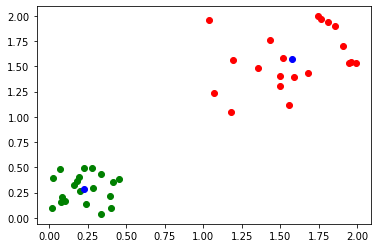

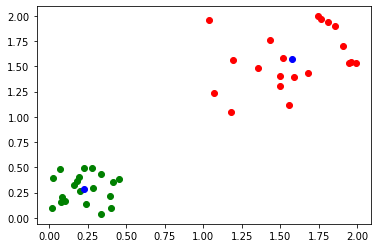

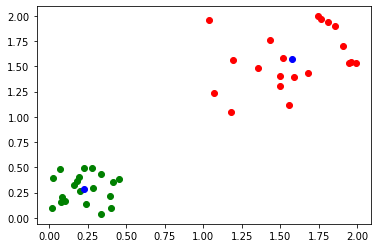

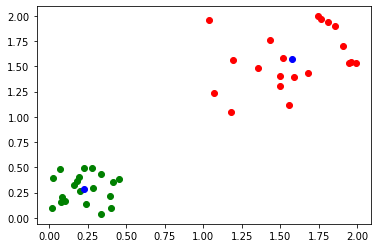

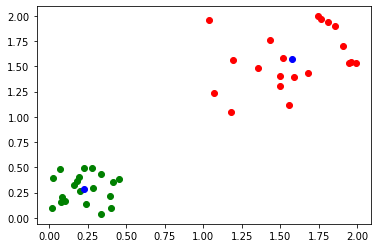

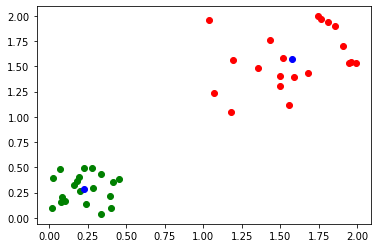

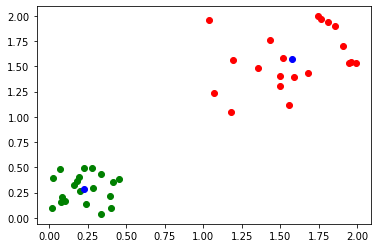

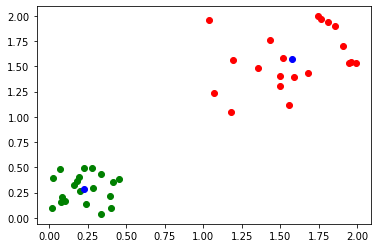

In [37]:
for item in history_centroids:
    plot_step_by_step(dataset, [item], belongs_to)